<a href="https://colab.research.google.com/github/ARSHITHbabu/Fake-News-Prediction-Project/blob/main/Project_1_Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1)** *Importing the Libraries*

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**2)** *Importing data sets*

In [ ]:
# Uploading fake news
fakeNews = pd.read_csv("/content/Fake.csv")
fakeNews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# Uploading True News
trueNews = pd.read_csv("/content/True.csv")
trueNews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


**3)** *EDA (exploratory data analysis)*

In [ ]:
trueNews.info() # information about true news stories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fakeNews.info() # information about fake news stories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [49]:
fakeNews.isnull().sum()

title      0
text       0
subject    0
date       0
isFake     0
dtype: int64

In [ ]:
trueNews.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Upon examination, it is clear that the given data sets are complete and they are showing no signs of omissions.


<Axes: xlabel='count', ylabel='subject'>

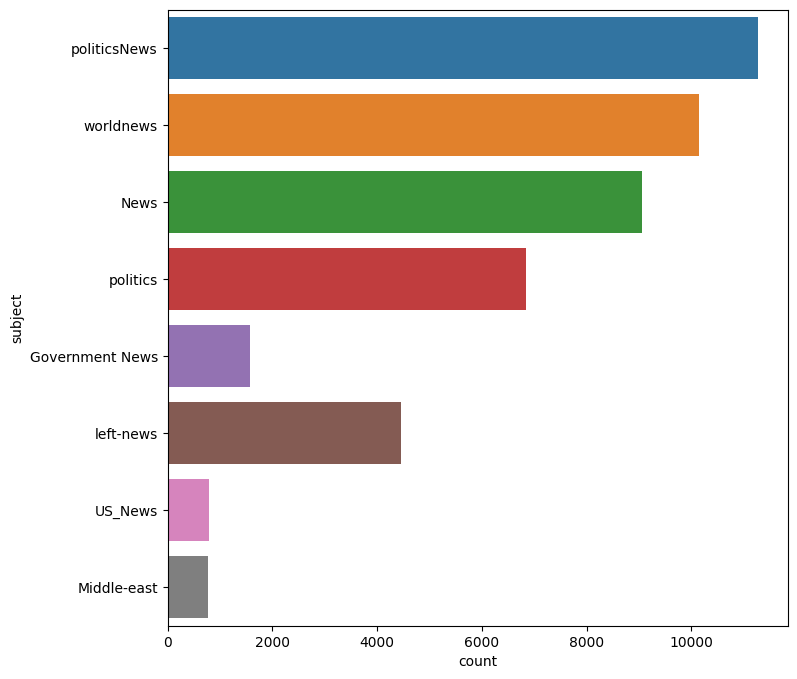

In [ ]:
#plotting the given data set using seaborn
plt.figure(figsize=(8, 8))
sns.countplot(data=pd.concat([trueNews,fakeNews]).reset_index(drop = True), y='subject')

In [ ]:
#Percentage of true news and fake news
print(f"Percentage of true news in the dataset: {round(trueNews.size / (trueNews.size + fakeNews.size) * 100, 4)}%")
print(f"Percentage of fake news in the dataset: {round(fakeNews.size / (trueNews.size + fakeNews.size) * 100, 4)}%")


Percentage of true news in the dataset: 47.7015%
Percentage of fake news in the dataset: 52.2985%


**4)** *Data Pre-processing*

In [29]:
# Let's add a target metric
trueNews['isFake'] = 0
trueNews.head()

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
# Let's add a target metric
fakeNews['isFake'] = 1
fakeNews.head()

,title,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [30]:
#Combine the 2 datasets
df = pd.concat([trueNews,fakeNews]).reset_index(drop = True)
df

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [31]:
# Let's remove the date because it's not informative.
df.drop('date', axis=1, inplace=True)
df

,title,text,subject,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1


In [32]:
# Let's remove the subject because it's not required.
df.drop('subject', axis=1, inplace=True)
df

,title,text,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0
...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,1


In [ ]:
# Let's connect the title and the text of the news
df['content'] = df['title'] + df['text']
df

,title,text,isFake,content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,1,McPain: John McCain Furious That Iran Treated ...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,1,How to Blow $700 Million: Al Jazeera America F...


In [ ]:
# separating the data & label
X = df.drop(columns='isFake', axis=1)
Y = df['isFake']

In [ ]:
print(X)
print(Y)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text  \
0      WASHINGTON (Reuters) - The head of a conservat...   
1      WASHINGTON (Reuters) - Transgender people will...   
2      WASHINGTON (Reuters) - The special counsel inv...   
3      WASHINGTON (Reuters) - Trump cam

\ **Preprocessing**

In [ ]:
#Extract meaningful words from the text.
def preprocessing(text):

    stop_words = set(stopwords.words('english'))

    # Use re.findall to extract words
    words = re.findall(r'\w+', text)

    # Filter out short words and stop words
    meaningful_words = [word.lower() for word in words if len(word) > 3 and word.lower() not in stop_words]

    return meaningful_words


In [ ]:
# Let's apply the function to the whole news
df['clean'] = df['content'].apply(lambda x: preprocessing(x))

In [ ]:
df['clean']

0        [budget, fight, looms, republicans, flip, fisc...
1        [military, accept, transgender, recruits, mond...
2        [senior, republican, senator, mueller, washing...
3        [russia, probe, helped, australian, diplomat, ...
4        [trump, wants, postal, service, charge, much, ...
                               ...                        
44893    [mcpain, john, mccain, furious, iran, treated,...
44894    [justice, yahoo, settles, mail, privacy, class...
44895    [sunnistan, allied, safe, zone, plan, take, te...
44896    [blow, million, jazeera, america, finally, cal...
44897    [navy, sailors, held, iranian, military, signs...
Name: clean, Length: 44898, dtype: object

\ **Stemming**

In [ ]:
def stemming(clean):
    # Remove non-alphabetic characters and convert to lowercase
    cleaned_clean = re.sub('[^a-zA-Z]', ' ', clean)
    cleaned_clean = cleaned_clean.lower()

    # Tokenize the cleaned content
    words = cleaned_clean.split()

    # Initialize the Porter Stemmer
    port_stem = PorterStemmer()

    # Perform stemming and remove stopwords
    stemmed_clean = [port_stem.stem(word) for word in words if word not in stopwords.words('english')]

    # Join the stemmed words back into a string
    stemmed_clean = ' '.join(stemmed_clean)

    return stemmed_clean

In [ ]:
df['clean'] = df['clean'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['clean'] = df['clean'].apply(stemming)

In [ ]:
print(df['clean'])

0        budget fight loom republican flip fiscal scrip...
1        militari accept transgend recruit monday penta...
2        senior republican senat mueller washington reu...
3        russia probe help australian diplomat nytwashi...
4        trump want postal servic charg much amazon shi...
                               ...                        
44893    mcpain john mccain furiou iran treat sailor we...
44894    justic yahoo settl mail privaci class action l...
44895    sunnistan alli safe zone plan take territori b...
44896    blow million jazeera america final call quit s...
44897    navi sailor held iranian militari sign neocon ...
Name: clean, Length: 44898, dtype: object


In [ ]:
#separating the data and label
X = df['clean'].values
Y = df['isFake'].values

In [33]:
X

array(['budget fight loom republican flip fiscal scriptwashington reuter head conserv republican faction congress vote month huge expans nation debt cut call fiscal conserv sunday urg budget restraint keep sharp pivot among republican repres mark meadow speak face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want budget increas militari spend democrat also want proport increas defens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will go increas defens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say enough need give govern rais percent fiscal conserv rational eventu peopl money said meadow among republican vote late decemb 

In [34]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [35]:
Y.shape

(44898,)

\ **TfidfVectorizer**

In [36]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [37]:
print(X)

  (0, 104006)	0.03265342310303051
  (0, 103447)	0.04668722340099142
  (0, 102152)	0.04282398548634808
  (0, 101997)	0.019711779469306634
  (0, 101170)	0.03653765270691554
  (0, 101139)	0.06344518748045543
  (0, 100873)	0.020573851264014544
  (0, 100522)	0.027903170624384386
  (0, 100463)	0.021884503473789268
  (0, 100460)	0.04729319363252402
  (0, 100295)	0.03729944316625474
  (0, 100262)	0.047891160601243286
  (0, 99813)	0.02373305075180742
  (0, 99616)	0.07767284240309662
  (0, 99497)	0.06395570263941275
  (0, 98919)	0.08946708223730265
  (0, 96944)	0.031822091895791896
  (0, 96216)	0.019194527103001815
  (0, 94813)	0.023966431413544584
  (0, 93800)	0.10042272409781809
  (0, 93551)	0.1321146443594455
  (0, 93448)	0.023848943201945513
  (0, 92498)	0.01778988105210804
  (0, 91404)	0.021518098012975898
  (0, 90758)	0.03487382912207663
  :	:
  (44897, 9933)	0.1913930802011707
  (44897, 9644)	0.07976852527222697
  (44897, 9627)	0.044730526441240155
  (44897, 9485)	0.04183546259960787
  (4

**5)** *Model fitting*

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

\ **Linear Regression**

In [39]:
model = LogisticRegression()

In [40]:
model.fit(X_train, Y_train)

LogisticRegression()

In [41]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [42]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9890584108246562


In [43]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [44]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9837416481069042


\ **Making a Predictive System**

In [51]:
X_new = X_test[456]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [57]:
#verification
print(Y_test[456])

0


In [54]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [56]:
#verification
print(Y_test[3])

1
